# Test 2

### Setup
Load needed API keys and relevant Python libaries.

In [16]:
#!pip install matplotlib
# 1-> Load Dataset file
#import pandas to read csv and show to basic analysis
import pandas as pd
import os

dir_path = r'dataset2'
df01 = pd.DataFrame()

for file_path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, file_path)):
        file_name = os.path.join(dir_path, file_path)
        #print("file_name:",file_name)
        sheet = "Sheet1" 
        df01=pd.concat([df01,pd.read_excel(io=file_name, sheet_name=sheet)])
        

df01.head(5)



,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorates,Directorate,Unnamed: 10,Directorate
0,2016-09-22,VR,74.46,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities,NaN,NaN,NaN
1,2016-09-13,VR,55.00,tex sussex sstn,************8738,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities,NaN,NaN,NaN
2,2016-09-07,VR,50.00,meridian service s,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities,NaN,NaN,NaN
3,2016-09-16,VR,45.00,malthurst petroleu,************5804,K020,Vehicle Fuel,RV18M,Tyburn Road Centre,A00,Adult & Communities,NaN,NaN,NaN
4,2016-09-21,VR,40.00,malthurst petroleu,************5804,K020,Vehicle Fuel,RV18M,Tyburn Road Centre,A00,Adult & Communities,NaN,NaN,NaN


In [19]:
# 2 -> After initial analysis and found empty columns

#delete columns with all n/a values
df02 = df01.dropna(axis=1, how='all')

#delete rowns with any n/a values
df = df02.dropna(axis=0, how='all')

display(df)

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorates,Directorate,Unnamed: 10,Directorate
0,2016-09-22,VR,74.46,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities,NaN,NaN,NaN
1,2016-09-13,VR,55.00,tex sussex sstn,************8738,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities,NaN,NaN,NaN
2,2016-09-07,VR,50.00,meridian service s,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities,NaN,NaN,NaN
3,2016-09-16,VR,45.00,malthurst petroleu,************5804,K020,Vehicle Fuel,RV18M,Tyburn Road Centre,A00,Adult & Communities,NaN,NaN,NaN
4,2016-09-21,VR,40.00,malthurst petroleu,************5804,K020,Vehicle Fuel,RV18M,Tyburn Road Centre,A00,Adult & Communities,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5014,2016-01-06,VR,72.53,tesco pfs 4203,************6790,K020,Vehicle Fuel,RHEE7,Ladywood CBH05 Neigh C'takers,A00,NaN,Local Services,NaN,NaN
5015,2016-01-22,VZ,12.96,postoffice selfservice,************9313,L700,Postage,RGA50,District Engineers-EGD,A00,NaN,Local Services,NaN,NaN
5016,2016-01-15,VR,50.99,esso aston way ss,************4599,K020,Vehicle Fuel,RHNCA,Careline,A00,NaN,Local Services,NaN,NaN
5017,2016-01-20,VR,48.45,jacksons services ltd,************4599,K020,Vehicle Fuel,RHNCA,Careline,A00,NaN,Local Services,NaN,NaN


In [25]:
import numpy as np
df.describe(include=[np.number])

,ORIGINAL GROSS AMT
count,97212.000000
mean,156.011072
std,1757.997300
min,-199741.090000
25%,12.490000
50%,40.000000
75%,89.400000
max,106289.880000


In [26]:
#get columns names
for col in df.columns:
    print(col)

TRANS DATE
TRANS VAT DESC
ORIGINAL GROSS AMT
MERCHANT NAME
CARD NUMBER
TRANS CAC CODE 1
TRANS CAC DESC 1
TRANS CAC CODE 2
TRANS CAC DESC 2
TRANS CAC CODE 3
Directorates
Directorate
Unnamed: 10
Directorate 


In [27]:
#RECENCY
df_recency = df.groupby(by='CARD NUMBER',
                        as_index=False)['TRANS DATE'].max()
df_recency.columns = ['CARD NUMBER', 'TRANS DATE']
recent_date = df_recency['TRANS DATE'].max()
df_recency['Recency'] = df_recency['TRANS DATE'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CARD NUMBER,TRANS DATE,Recency
0,************0024,2016-10-19,75
1,************0040,2016-11-21,42
2,************0047,2016-12-13,20
3,************0057,2016-12-21,12
4,************0065,2016-12-15,18


In [28]:
#FRECUENCY
frequency_df = df.drop_duplicates().groupby(
    by=['CARD NUMBER'], as_index=False)['TRANS DATE'].count()
frequency_df.columns = ['CARD NUMBER', 'Frequency']
frequency_df.head()

,CARD NUMBER,Frequency
0,************0024,15
1,************0040,16
2,************0047,341
3,************0057,16
4,************0065,179


In [30]:
#MONETARY
monetary_df = df.groupby(by='CARD NUMBER', as_index=False)['ORIGINAL GROSS AMT'].sum()
monetary_df.columns = ['CARD NUMBER', 'Monetary']
monetary_df.head()

,CARD NUMBER,Monetary
0,************0024,1371.91
1,************0040,1076.90
2,************0047,29691.48
3,************0057,1393.22
4,************0065,16854.77


In [31]:
#Join dataframes to create RFM
rf_df = df_recency.merge(frequency_df, on='CARD NUMBER')
rfm_df = rf_df.merge(monetary_df, on='CARD NUMBER').drop(
    columns='TRANS DATE')
rfm_df.head()

,CARD NUMBER,Recency,Frequency,Monetary
0,************0024,75,15,1371.91
1,************0040,42,16,1076.90
2,************0047,20,341,29691.48
3,************0057,12,16,1393.22
4,************0065,18,179,16854.77


In [33]:
#Unique card ID in rfm
rfm_df['CARD NUMBER'].nunique()

1210

In [35]:
#Unique card ID in total data
df['CARD NUMBER'].nunique()

1210

In [36]:
#Normalize RFM
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CARD NUMBER,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,************0024,75,15,1371.91,37.411862,27.727273,27.727273
1,************0040,42,16,1076.90,42.845292,28.884298,28.884298
2,************0047,20,341,29691.48,65.532974,96.983471,96.983471
3,************0057,12,16,1393.22,86.893405,28.884298,28.884298
4,************0065,18,179,16854.77,73.745334,88.140496,88.140496


In [37]:
#Calculate RFM Score
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CARD NUMBER', 'RFM_Score']].head(7)

,CARD NUMBER,RFM_Score
0,************0024,1.46
1,************0040,1.55
2,************0047,4.61
3,************0057,1.88
4,************0065,4.30
5,************0073,3.34
6,************0080,3.72


In [38]:
#Define a Customer segment
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CARD NUMBER', 'RFM_Score', 'Customer_segment']].head(20)

,CARD NUMBER,RFM_Score,Customer_segment
0,************0024,1.46,Lost Customers
1,************0040,1.55,Lost Customers
2,************0047,4.61,Top Customers
3,************0057,1.88,Low Value Customers
4,************0065,4.30,High value Customer
5,************0073,3.34,Medium Value Customer
6,************0080,3.72,Medium Value Customer
7,************0082,0.93,Lost Customers
8,************0085,2.34,Low Value Customers
9,************0090,1.89,Low Value Customers


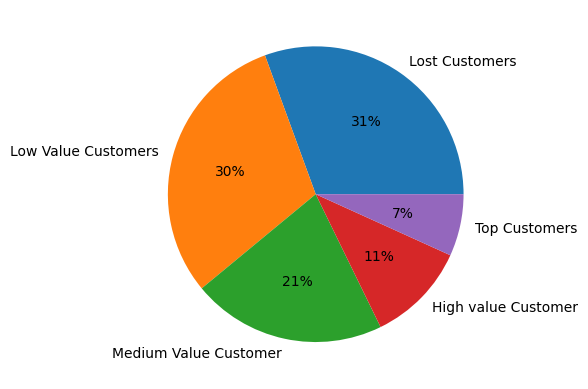

In [43]:
#plot RFM customers
import matplotlib.pyplot as plt

plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()